In [1]:

import sys
from urllib.request import Request, urlopen
from datetime import *
import json
import requests as req
from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
import pandas as pd 
import time
from bs4 import BeautifulSoup as bs
import requests
import re

### 데이터 통합

In [9]:
call_list = [1,2,3,4,5,7,8,9,10,11,12,13,14,15]

In [10]:
for i in call_list:
    globals()['globals_{}'.format(i)] = pd.read_csv('./tw크롤링 데이터/snsresultsampleAPI'+str(i)+'.csv', encoding = 'utf-8')


FileNotFoundError: [Errno 2] No such file or directory: './tw크롤링 데이터/snsresultsampleAPI1.csv'

In [103]:
#중복제거
for i in call_list:
    globals()['sample_{}'.format(i)] = globals()['globals_{}'.format(i)].drop_duplicates(['내용'])


In [105]:
data = pd.concat([
    sample_1,sample_2,sample_3,sample_4, sample_5,
        sample_7,sample_8,sample_9,sample_10,sample_11,sample_12,
                  sample_13,sample_14,sample_15
])
data


,종목,내용
0,동화약품,"평택촌놈 정오영\n@pt502\n·\nNov 24, 2020\n[부탁]\n오늘 식사..."
1,동화약품,"982_writer(이경태)\n@dqrudxo88\n·\nNov 24, 2020\n..."
2,동화약품,"21세기노비-ㅅ\n@80ksyo\n·\nNov 24, 2020\nSK·동화약품 등 ..."
3,동화약품,"평택촌놈 정오영\n@pt502\n·\nNov 24, 2020\n[알림]\n이번 주까..."
4,동화약품,"부업아빠\n@kjahok\n·\nNov 24, 2020\n동화약품 임상 주가 전망 ..."
...,...,...
9400,프레스티지바이오파마,더퍼스트경제TV\n@TheFirstEconomy\n·\nFeb 5\n#프레스티지바이...
9401,프레스티지바이오파마,더퍼스트경제TV\n@TheFirstEconomy\n·\nFeb 5\n[특징주]프레스...
9402,프레스티지바이오파마,"김원준\n@kimwj1\n·\nJan 28\n유망 제약바이오 IPO, 신축년에도 쏟..."
9403,프레스티지바이오파마,Lewis Lee\n@Onsdad\n·\nJan 27\n2021년 첫 공모주 투자 ...


In [69]:
#data.to_csv('data.csv', index=False, encoding='utf-8-sig')

## 종목명마다 몇개의 트윗있는지

In [106]:
list1 = []
jmName = data['종목'].unique()
for jm in jmName:
    tempdf = data[data['종목'] == jm] ## df[조건식]
    list1.append([jm, len(tempdf)])
    #df.query('종목' == jm')  df.query(조건식 문자열)
    #for temp in tempdf['내용']:
        #print(temp)
#2차원리스트를 트윗수순으로 정렬
list1.sort(key=lambda x:x[1],reverse=True)
list1

       
    

[['휴비스', 347],
 ['대웅', 343],
 ['대한제분', 339],
 ['써니전자', 338],
 ['대한해운', 331],
 ['젬백스', 328],
 ['아센디오', 325],
 ['한전산업', 319],
 ['주성엔지니어링', 317],
 ['안국약품', 316],
 ['조비', 316],
 ['셀리드', 316],
 ['자이언트스텝', 313],
 ['세방', 311],
 ['빙그레', 309],
 ['금호건설', 308],
 ['사조산업', 308],
 ['동원산업', 303],
 ['KTis', 302],
 ['원익IPS', 302],
 ['오리콤', 300],
 ['코아스', 300],
 ['알톤스포츠', 300],
 ['조흥', 295],
 ['SK가스', 295],
 ['제일약품', 293],
 ['티맥스소프트', 292],
 ['제이콘텐트리', 291],
 ['한진', 289],
 ['OQP', 289],
 ['아스타', 289],
 ['한양', 284],
 ['홈캐스트', 284],
 ['비올', 284],
 ['파트론', 283],
 ['오리온', 282],
 ['농심', 281],
 ['아이센스', 281],
 ['코콤', 280],
 ['KNN', 280],
 ['서연', 279],
 ['현대미포조선', 279],
 ['에이블씨엔씨', 279],
 ['멀티캠퍼스', 278],
 ['ISC', 278],
 ['엠플러스', 278],
 ['알서포트', 276],
 ['유아이디', 275],
 ['서남', 275],
 ['솔트룩스', 275],
 ['대원', 274],
 ['포티스', 274],
 ['화신', 273],
 ['리드코프', 273],
 ['하츠', 273],
 ['와이지엔터테인먼트', 273],
 ['엔에프씨', 273],
 ['동국제강', 272],
 ['한국석유', 272],
 ['오텍', 272],
 ['LF', 272],
 ['한국철강', 272],
 ['지코', 271],
 ['퍼시스', 270],
 ['

In [107]:
sortData = pd.DataFrame(list1,columns = ['종목','트윗수'])

TypeError: unhashable type: 'numpy.ndarray'

C:\Users\SM2113\.conda\envs\deep01\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2113\.conda\envs\deep01\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50967 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2113\.conda\envs\deep01\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2113\.conda\envs\deep01\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SM2113\.conda\envs\deep01\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50967 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SM2113\.conda\envs\deep01\lib\site-packages\matplotlib\backends\backen

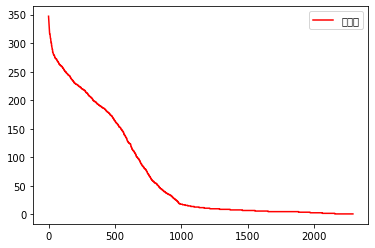

In [108]:
sortData.plot(color = "#ff0000")
plt.plot(sortData, marker = '*', color = 'r')
plt.show()

# 그래프화 결과
# 트윗갯수가 50개 이상인 종목 700여개가 의미있다고 판단 
# 나머지 1500개는 과감히 드랍!


In [97]:
list1[700]

['SV인베스트먼트', 57]

In [99]:
sortData

,종목,트윗수
0,대웅,343
1,대한제분,339
2,써니전자,338
3,대한해운,331
4,아센디오,325
...,...,...
1951,사운드백신,1
1952,SMART KIS단기통안채,1
1953,엔에이치스팩19호,1
1954,네비게이터 친환경자동차밸류체인액티브,1


In [100]:

# 그래프화 결과
# 트윗갯수가 50개 이상인 종목 700여개가 의미있다고 판단 
# 나머지 1500개는 과감히 드랍!
len(list1[:700])
sortData.to_csv('sortData.csv', index=False, encoding='utf-8-sig')

## 긍정,부정,중립 라벨 정보

In [12]:
#파일에서 단어를 불러와 posneg리스트를 만드는 코드
import codecs
positive = []
negative = []
posneg = []
#긍정라벨
pos = codecs.open("./positive_words_self.txt", 'rb', encoding='UTF-8')

while True:
    line = pos.readline()
    line = line.replace('\n', '')
    positive.append(line)
    posneg.append(line)
    if not line: break
pos.close()
#부정라벨
neg = codecs.open("./negative_words_self.txt", 'rb', encoding='UTF-8')

while True:
    line = neg.readline()
    line = line.replace('\n', '')
    negative.append(line)
    posneg.append(line)
    if not line: break
neg.close()


In [14]:
list1 = []
jmName = sns['종목'].unique()
for jm in jmName:
    tempdf = sns[sns['종목'] == jm] ## df[조건식]
    list1.append([jm, len(tempdf)])
list1
    #df.query('종목' == jm')  df.query(조건식 문자열)
    #for temp in tempdf['내용']:
        #print(temp)
        
    

[['동화약품', 203],
 ['KR모터스', 9],
 ['경방', 85],
 ['메리츠화재', 67],
 ['삼양홀딩스', 7],
 ['하이트진로', 173],
 ['유한양행', 132],
 ['CJ대한통운', 181],
 ['하이트진로홀딩스', 1],
 ['두산', 249],
 ['성창기업지주', 2],
 ['DL', 233],
 ['유유제약', 10],
 ['한국앤컴퍼니', 117],
 ['삼천당제약', 185],
 ['기아', 179],
 ['대유플러스', 33],
 ['노루홀딩스', 11],
 ['한화손해보험', 13],
 ['삼화페인트', 220],
 ['롯데손해보험', 10],
 ['대원강업', 2],
 ['중앙에너비스', 8],
 ['조선내화', 5],
 ['대동', 207],
 ['가온전선', 1],
 ['삼일제약', 14],
 ['흥국화재', 10],
 ['동아쏘시오홀딩스', 7],
 ['천일고속', 6],
 ['SK하이닉스', 23],
 ['영풍', 231],
 ['LS네트웍스', 4],
 ['현대건설', 189],
 ['경남기업', 213],
 ['삼성화재', 69],
 ['강남제비스코', 28],
 ['한화', 220],
 ['보해양조', 9],
 ['유니온', 263],
 ['전방', 197],
 ['한국주철관', 1],
 ['DB하이텍', 69],
 ['신라섬유', 38],
 ['페이퍼코리아', 2],
 ['CJ', 242],
 ['JW중외제약', 7],
 ['대한방직', 192],
 ['LX인터내셔널', 7],
 ['대한제분', 339],
 ['국보', 238],
 ['유진투자증권', 9],
 ['금호전기', 9],
 ['동국제강', 272],
 ['GS글로벌', 12],
 ['남광토건', 8],
 ['부국증권', 5],
 ['상상인증권', 7],
 ['백광산업', 4],
 ['삼성제약', 10],
 ['SG글로벌', 10],
 ['KG케미칼', 5],
 ['태원물산', 5],
 ['세아베스틸', 9],
 ['대한전선', 118]

In [15]:
list1

[['동화약품', 203],
 ['KR모터스', 9],
 ['경방', 85],
 ['메리츠화재', 67],
 ['삼양홀딩스', 7],
 ['하이트진로', 173],
 ['유한양행', 132],
 ['CJ대한통운', 181],
 ['하이트진로홀딩스', 1],
 ['두산', 249],
 ['성창기업지주', 2],
 ['DL', 233],
 ['유유제약', 10],
 ['한국앤컴퍼니', 117],
 ['삼천당제약', 185],
 ['기아', 179],
 ['대유플러스', 33],
 ['노루홀딩스', 11],
 ['한화손해보험', 13],
 ['삼화페인트', 220],
 ['롯데손해보험', 10],
 ['대원강업', 2],
 ['중앙에너비스', 8],
 ['조선내화', 5],
 ['대동', 207],
 ['가온전선', 1],
 ['삼일제약', 14],
 ['흥국화재', 10],
 ['동아쏘시오홀딩스', 7],
 ['천일고속', 6],
 ['SK하이닉스', 23],
 ['영풍', 231],
 ['LS네트웍스', 4],
 ['현대건설', 189],
 ['경남기업', 213],
 ['삼성화재', 69],
 ['강남제비스코', 28],
 ['한화', 220],
 ['보해양조', 9],
 ['유니온', 263],
 ['전방', 197],
 ['한국주철관', 1],
 ['DB하이텍', 69],
 ['신라섬유', 38],
 ['페이퍼코리아', 2],
 ['CJ', 242],
 ['JW중외제약', 7],
 ['대한방직', 192],
 ['LX인터내셔널', 7],
 ['대한제분', 339],
 ['국보', 238],
 ['유진투자증권', 9],
 ['금호전기', 9],
 ['동국제강', 272],
 ['GS글로벌', 12],
 ['남광토건', 8],
 ['부국증권', 5],
 ['상상인증권', 7],
 ['백광산업', 4],
 ['삼성제약', 10],
 ['SG글로벌', 10],
 ['KG케미칼', 5],
 ['태원물산', 5],
 ['세아베스틸', 9],
 ['대한전선', 118]

In [17]:
tempdf = sns[sns['종목'] == '동화약품']
tempdf
for temp in tempdf['내용']:
    print(temp)
    print('---------------------------')

평택촌놈 정오영
@pt502
·
Nov 24, 2020
[부탁]
오늘 식사시간 30분 제외하면
지금까지 주식 분석+리딩 몰입
트위터 꼬리말이 너무 없어요.
아무나 올리면 소통하고 싶어요.

주식질문은 답변을 못 합니다.
어떤 주제든 다른 것은 가능합니다.

[정보] 오후 2시 15분
어제 1종목추천 동화약품
오늘 1종목추천 제약주
오늘 단기2개 종가정리
9
1
110
---------------------------
982_writer(이경태)
@dqrudxo88
·
Nov 24, 2020
Replying to 
@hana24242
동화약품꺼 헬민200
1
---------------------------
21세기노비-ㅅ
@80ksyo
·
Nov 24, 2020
SK·동화약품 등 토종 코로나 백신·치료제 개발도 탄력 (출처 : 머니투데이 | 네이버 뉴스) http://naver.me/GZMURw9E
1
---------------------------
평택촌놈 정오영
@pt502
·
Nov 24, 2020
[알림]
이번 주까지 유료회원 최대한 입성
종목분석과 매매기준 완벽 컨디션
파생은 아직 조금 더 정밀함 필요

동화약품
어제 딱 1종목만 추천, 편안한 매수가격
오늘 상한가 기록 후 공방, 놀라운 적중
중기1
그동안 크게 가지도 밀리지도 않았던 종목
그래서 일부러 중기로 길게 보유, 오늘 상승
6
1
98
---------------------------
부업아빠
@kjahok
·
Nov 24, 2020
동화약품 임상 주가 전망 코로나
sidelinedad.tistory.com
동화약품 임상 주가 전망 코로나
SK바이오사이언스의 코로나19 백신 및 동화약품의 치료제가 임상시험 승인을 받았다고 합니다. 식약처는 SK바이오사이언스가 개발 중인 코로나19 백신 'NBP2001'의 임상 1상과 동화약품의 코로나19 치료제 'DW2008..
---------------------------
21세기노비-ㅅ
@80ksyo
·
Nov 24, 2020
동화약품...
---

In [18]:
len(tempdf)

203

In [19]:
negative

['갑질',
 '논란',
 '폭리',
 '허위',
 '과징금',
 '눈물',
 '피해',
 '포화',
 '우롱',
 '위반',
 '리스크',
 '사퇴',
 '급락',
 '하락',
 '폐업',
 '불만',
 '산재',
 '닫아',
 '손배소',
 '구설수',
 '폐점',
 '적발',
 '침해',
 '빨간불',
 '취약',
 '불명예',
 '분신',
 '구형',
 '기소',
 '반토막',
 '호소',
 '불매',
 '냉담',
 '문제',
 '직격탄',
 '한숨',
 '불똥',
 '항의',
 '묵묵부담',
 '싸늘',
 '일탈',
 '파문',
 '게이트',
 '횡령',
 '사과문',
 '여파',
 '울상',
 '초토화',
 '급감',
 '우려',
 '중단',
 '퇴출',
 '해지',
 '일베',
 '이물질',
 '벌레',
 '엉망',
 '적발',
 '위생불량',
 '위생엉망',
 '소송',
 '하락',
 '매출하락',
 '반토막',
 '혐의',
 '불매',
 '부채',
 '적발',
 '폭리',
 '과징금',
 '오너리스크',
 '매각',
 '포기',
 '불만',
 '']

In [20]:
posneg

['MOU',
 '제휴',
 '주목',
 '호응',
 '돌파',
 '이목',
 '수상',
 '입점',
 '인기',
 '열풍',
 '진화',
 '대박',
 '순항',
 '유치',
 '1위',
 '출시',
 '선보여',
 '오픈',
 '팝업',
 '돌풍',
 '팝업스토어',
 '인싸',
 '줄서서',
 '인기',
 '대세',
 '트렌드',
 '불티',
 '진출',
 '부상',
 '체결',
 '증가',
 '봉사',
 '기부',
 '신메뉴',
 '신제품',
 '신상',
 '최고',
 '새로운',
 '편한',
 '미소',
 '맛집',
 '착한가게',
 '캠패인',
 '순항',
 '착한',
 '제작지원',
 '',
 '갑질',
 '논란',
 '폭리',
 '허위',
 '과징금',
 '눈물',
 '피해',
 '포화',
 '우롱',
 '위반',
 '리스크',
 '사퇴',
 '급락',
 '하락',
 '폐업',
 '불만',
 '산재',
 '닫아',
 '손배소',
 '구설수',
 '폐점',
 '적발',
 '침해',
 '빨간불',
 '취약',
 '불명예',
 '분신',
 '구형',
 '기소',
 '반토막',
 '호소',
 '불매',
 '냉담',
 '문제',
 '직격탄',
 '한숨',
 '불똥',
 '항의',
 '묵묵부담',
 '싸늘',
 '일탈',
 '파문',
 '게이트',
 '횡령',
 '사과문',
 '여파',
 '울상',
 '초토화',
 '급감',
 '우려',
 '중단',
 '퇴출',
 '해지',
 '일베',
 '이물질',
 '벌레',
 '엉망',
 '적발',
 '위생불량',
 '위생엉망',
 '소송',
 '하락',
 '매출하락',
 '반토막',
 '혐의',
 '불매',
 '부채',
 '적발',
 '폭리',
 '과징금',
 '오너리스크',
 '매각',
 '포기',
 '불만',
 '']

In [40]:
label = [0] * 4000

my_title_dic = {"title":[], "label":label}

j = 0

for i in range(400):
    num = i * 10 + 1

    titles = sns[i]
    
    for title in titles:
        title_data = str(title.text)
        clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', title_data)
        my_title_dic['title'].append(title_data)
        
        for i in range(len(posneg)):
            posflag = False
            negflag = False
            if i < (len(positive)-1):
                # print(title_data.find(posneg[i])) 
                if title_data.find(posneg[i]) != -1:
                    posflag = True
                    print(i, "positive?","테스트 : ",title_data.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", i, title_data)
                    break
            if i > (len(positive)-2):
                if title_data.find(posneg[i]) != -1:
                    negflag = True
                    print(i, "negative?","테스트 : ",title_data.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", i, title_data)
                    break
        if posflag == True:
            label[j] = 1
            # print("positive", j)
        elif negflag == True:
            label[j] = -1
            # print("negative", j)
        elif negflag == False and posflag == False:
            label[j] = 0
            # print("objective", j)
        j = j + 1
my_title_dic['label'] = label
my_title_df = pd.DataFrame(my_title_dic)


KeyError: 0

In [2]:
#데이터 불러오기
data=pd.read_csv('snsdata.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160792 entries, 0 to 160791
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   종목      160792 non-null  object
 1   내용      160778 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [3]:
data.head()

,종목,내용
0,동화약품,"평택촌놈 정오영\n@pt502\n·\nNov 24, 2020\n[부탁]\n오늘 식사..."
1,동화약품,"982_writer(이경태)\n@dqrudxo88\n·\nNov 24, 2020\n..."
2,동화약품,"21세기노비-ㅅ\n@80ksyo\n·\nNov 24, 2020\nSK·동화약품 등 ..."
3,동화약품,"평택촌놈 정오영\n@pt502\n·\nNov 24, 2020\n[알림]\n이번 주까..."
4,동화약품,"부업아빠\n@kjahok\n·\nNov 24, 2020\n동화약품 임상 주가 전망 ..."


In [4]:
data.shape

(160792, 2)

In [5]:
#결측치
data.isnull().sum()

종목     0
내용    14
dtype: int64

In [25]:
!pip install konlpy==0.5.2 jpype1 Jpype1-py3

  Using cached JPype1-py3-0.5.5.4.tar.gz (88 kB)
  Running setup.py clean for Jpype1-py3
Failed to build Jpype1-py3
    Running setup.py install for Jpype1-py3: started
    Running setup.py install for Jpype1-py3: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\sm2127\anaconda3\envs\deep01\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\SM2127\\AppData\\Local\\Temp\\pip-install-x1c02gaw\\jpype1-py3_0a86985b08b24ea088e33e4e7fa4bc07\\setup.py'"'"'; __file__='"'"'C:\\Users\\SM2127\\AppData\\Local\\Temp\\pip-install-x1c02gaw\\jpype1-py3_0a86985b08b24ea088e33e4e7fa4bc07\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\SM2127\AppData\Local\Temp\pip-wheel-42c4e2g2'
       cwd: C:\Users\SM2127\AppData\Local\Temp\pip-install-x1c02gaw\jpype1-py3_0a86985b08b24ea088e33e4e7fa4bc07\
  Complete output (54 lines):
  
  ********* DEPRECATION WARNING *********
  ********* DEPRECATION WARNING *********
 

In [6]:
# 내용변수 확인
data['내용'][0]

'평택촌놈 정오영\n@pt502\n·\nNov 24, 2020\n[부탁]\n오늘 식사시간 30분 제외하면\n지금까지 주식 분석+리딩 몰입\n트위터 꼬리말이 너무 없어요.\n아무나 올리면 소통하고 싶어요.\n\n주식질문은 답변을 못 합니다.\n어떤 주제든 다른 것은 가능합니다.\n\n[정보] 오후 2시 15분\n어제 1종목추천 동화약품\n오늘 1종목추천 제약주\n오늘 단기2개 종가정리\n9\n1\n110'

In [7]:
#한국어 텍스트 데이터 전처리

In [20]:
# 정규 표현식 적용
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')#한글 추출 규칙: 띄어 쓰기(1개)를 포함한 한글
    result = hangul.sub('',text) # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [21]:
apply_regular_expression(data['내용'][0])

'평택촌놈 정오영  부탁오늘 식사시간 분 제외하면지금까지 주식 분석리딩 몰입트위터 꼬리말이 너무 없어요아무나 올리면 소통하고 싶어요주식질문은 답변을 못 합니다어떤 주제든 다른 것은 가능합니다정보 오후 시 분어제 종목추천 동화약품오늘 종목추천 제약주오늘 단기개 종가정리'

In [22]:
#3-1 한국어 형태소 분석 - 명사 단위 
#>> 명사 형태소 추출
from konlpy.tag import Okt
from collections import Counter

In [23]:
#명사 형태소 추출 함수 Okt()를 이용하여 정규표현식을 적용한 "text"첫 행 내용의 형태소를 추출해 보겠습니다.
apply_regular_expression(data['내용'][0])

'평택촌놈 정오영  부탁오늘 식사시간 분 제외하면지금까지 주식 분석리딩 몰입트위터 꼬리말이 너무 없어요아무나 올리면 소통하고 싶어요주식질문은 답변을 못 합니다어떤 주제든 다른 것은 가능합니다정보 오후 시 분어제 종목추천 동화약품오늘 종목추천 제약주오늘 단기개 종가정리'

In [24]:
okt = Okt() #명사 형태소 추출 함수 
nouns = okt.nouns(apply_regular_expression(data['내용'][0]))
nouns

SystemError: java.lang.UnsatisfiedLinkError: Native Library C:\Users\SM2127\anaconda3\envs\deep01\Lib\site-packages\_jpype.cp36-win_amd64.pyd already loaded in another classloader